In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
df = pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
df.shape

(614, 13)

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<AxesSubplot:>

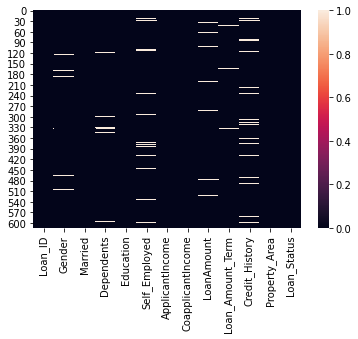

In [16]:
sns.heatmap(df.isnull())

In [17]:
df.fillna(df.mean(), inplace=True)

<AxesSubplot:>

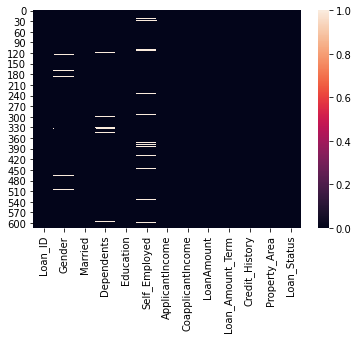

In [18]:
sns.heatmap(df.isnull())

In [19]:
df['Credit_History'].unique()

array([1.        , 0.        , 0.84219858])

In [20]:
Loan_approved = pd.get_dummies(df['Loan_Status'], drop_first = True)

In [21]:
gender = pd.get_dummies(df['Gender'], drop_first = True)

In [22]:
married = pd.get_dummies(df['Married'], drop_first = True)

In [23]:
data = pd.concat([df,Loan_approved,gender,married], axis=1)

In [24]:
data['Total_Income'] = data['ApplicantIncome']+data['CoapplicantIncome']

In [25]:
data.drop(['Loan_Status','ApplicantIncome','CoapplicantIncome'],axis =1 ,inplace = True)
data.drop(['Gender','Married','Dependents','Education','Self_Employed'],axis =1 ,inplace = True)

In [26]:
data.head()

,Loan_ID,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Y,Male,Yes,Total_Income
0,LP001002,146.412162,360.0,1.0,Urban,1,1,0,5849.0
1,LP001003,128.000000,360.0,1.0,Rural,0,1,1,6091.0
2,LP001005,66.000000,360.0,1.0,Urban,1,1,1,3000.0
3,LP001006,120.000000,360.0,1.0,Urban,1,1,1,4941.0
4,LP001008,141.000000,360.0,1.0,Urban,1,1,0,6000.0


In [27]:
x = data[['Total_Income','LoanAmount','Loan_Amount_Term','Credit_History']]
y = data['Y']

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
knn = KNeighborsClassifier(n_neighbors= 3)

In [32]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
predict = knn.predict(x_test)
predict

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.38      0.17      0.24        64
           1       0.66      0.85      0.74       121

    accuracy                           0.62       185
   macro avg       0.52      0.51      0.49       185
weighted avg       0.56      0.62      0.57       185



In [36]:
folds = 10

In [37]:
(9/10)*len(x)

552.6

In [38]:
knnAccuracy = []

In [39]:
ks = list(range(1,int((9/10)*len(x)),2))
ks

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 187,
 189,
 191,
 193,
 195,
 197,
 199,
 201,
 203,
 205,
 207,
 209,
 211,
 213,
 215,
 217,
 219,
 221,
 223,
 225,
 227,
 229,
 231,
 233,
 235,
 237,
 239,
 241,
 243,
 245,
 247,
 249,
 251,
 253,
 255,
 257,
 259,
 261,
 263,
 265,
 267,
 269,
 271,
 273,
 275,
 277,
 279,
 281,
 283,
 285,
 287,
 289,
 291,
 293,
 295,
 297,
 299,
 301,
 303,
 305,
 307,
 309,
 311,
 313,
 315,
 317,
 319,
 321,
 323,
 325,
 327,
 329,
 331,
 333,
 335,
 337,
 339,
 341,
 343,
 345,
 347,
 349,
 351,

In [40]:
for k in ks:
    testKNN = KNeighborsClassifier(n_neighbors= k)
    score = cross_val_score(testKNN, x, y, cv= 10, scoring= 'accuracy').mean()
    knnAccuracy.append(score)

In [41]:
knnAccuracy

[0.5637493389740877,
 0.5733474352194605,
 0.6074563722897937,
 0.6171866737176097,
 0.6416446324695928,
 0.6594923320994183,
 0.6774457958751983,
 0.6710206240084612,
 0.671099947117927,
 0.6776044420941301,
 0.6905869910100476,
 0.6954785827604442,
 0.6970914859862507,
 0.6921734531993655,
 0.692199894235854,
 0.6922263352723428,
 0.6905869910100477,
 0.690560549973559,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854575,
 0.6873083024854

In [42]:
maxScore = max(knnAccuracy)

In [43]:
knnAccuracy.index(maxScore)

12

In [44]:
ks[knnAccuracy.index(maxScore)]

25

In [45]:
finalknn = KNeighborsClassifier(n_neighbors = 25)

In [46]:
finalknn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [47]:
import pickle

In [48]:
#pickle.dump(finalknn, open('loan_data_set.pkl','wb'))

In [49]:
#loadedmodel = pickle.load(open('loan_data_set.pkl','rb'))

In [50]:
# passive aggresive
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report, accuracy_score


In [51]:
model = PassiveAggressiveClassifier(C = 0.5, random_state = 5)

In [52]:
model.fit(x_train, y_train)

PassiveAggressiveClassifier(C=0.5, random_state=5)

In [53]:
test_pred = model.predict(x_test)

In [54]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.65      1.00      0.79       121

    accuracy                           0.65       185
   macro avg       0.33      0.50      0.40       185
weighted avg       0.43      0.65      0.52       185



/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

In [55]:
pickle.dump(model, open('loan_data_set.pkl','wb'))

In [56]:
loadedmodel = pickle.load(open('loan_data_set.pkl','rb'))